In [1]:
import sklearn

In [2]:
sklearn.__version__

'0.24.1'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame(columns=["casado", "comprou"])

In [5]:
df.loc[0,:] = ["Sim", 1]
df.loc[1,:] = ["Sim", 1]
df.loc[2,:] = ["Não", 1]
df.loc[3,:] = ["Sim", 0]
df.loc[4,:] = ["Não", 0]
df.loc[5,:] = ["Não", 1]
df.loc[6,:] = ["Sim", 1]
df.loc[7,:] = ["Não", 0]

df

,casado,comprou
0,Sim,1
1,Sim,1
2,Não,1
3,Sim,0
4,Não,0
5,Não,1
6,Sim,1
7,Não,0


In [6]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

enc.fit_transform(df)

array([[1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.]])

In [7]:
enc.categories_

[array(['Não', 'Sim'], dtype=object), array([0, 1], dtype=object)]

In [8]:
df_pre = pd.DataFrame(enc.fit_transform(df), columns = df.columns, dtype=int)

df_pre

,casado,comprou
0,1,1
1,1,1
2,0,1
3,1,0
4,0,0
5,0,1
6,1,1
7,0,0


### Modelagem

In [9]:
X = df_pre[["casado"]]
X

,casado
0,1
1,1
2,0
3,1
4,0
5,0
6,1
7,0


In [10]:
y = df_pre.comprou

In [11]:
y

0    1
1    1
2    1
3    0
4    0
5    1
6    1
7    0
Name: comprou, dtype: int64

## Criar modelo Naive Bayes

In [12]:
from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB(alpha=0)

cnb.fit(X,y)

/home/mopdc/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


CategoricalNB(alpha=0)

## Testar

In [13]:
para_predizer = pd.DataFrame(columns=["casado"])
para_predizer.loc[0,:] = [0]
para_predizer.loc[1,:] = [1]
para_predizer

,casado
0,0.0
1,1.0


In [14]:
cnb.predict_proba(para_predizer)

array([[0.5 , 0.5 ],
       [0.25, 0.75]])

## O que o nosso tinha dado na aula?

## Problema de verdade:

In [15]:
df = pd.read_csv("./dados/base_categoricalnb.csv")
df

,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,no
2,services,married,high.school,no,yes,no,telephone,may,mon,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,no
4,services,married,high.school,no,no,yes,telephone,may,mon,no
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,yes


## Treino e teste

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('y', axis=1)
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=61658)

In [19]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X_train2 = pd.DataFrame(enc.fit_transform(X_train), columns = X_train.columns, dtype=int)
X_train2

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,1,1,1,1,2,0,0,3,3
1,4,1,6,0,0,0,1,4,3
2,7,0,3,0,2,2,0,7,1
3,4,0,6,0,2,0,1,6,3
4,9,1,2,0,0,0,0,9,4
...,...,...,...,...,...,...,...,...,...
28826,11,1,7,0,2,0,0,9,4
28827,1,1,5,1,0,2,1,6,3
28828,8,2,3,0,1,1,0,1,3
28829,0,2,3,0,0,0,0,0,2


In [20]:
enc.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['cellular', 'telephone'], dtype=object),
 array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep'], dtype=object),
 array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object)]

In [21]:
X_test2 = pd.DataFrame(enc.transform(X_test), columns=X_test.columns, dtype=int)

In [22]:
X_test2

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,0,1,6,0,2,2,0,3,4
1,5,1,0,1,2,0,1,6,2
2,7,2,3,0,2,0,0,6,3
3,10,1,3,0,0,2,1,6,2
4,1,1,1,0,2,0,1,6,3
...,...,...,...,...,...,...,...,...,...
12352,2,2,6,1,2,0,1,4,0
12353,0,2,3,0,0,0,0,3,2
12354,9,2,5,0,2,0,0,1,1
12355,4,2,6,0,2,2,1,6,3


In [23]:
from sklearn.preprocessing import LabelEncoder

enc2 = LabelEncoder()

y_train2 = enc2.fit_transform(y_train)
y_train2

array([0, 0, 0, ..., 1, 0, 0])

In [24]:
y_test2 = enc2.transform(y_test)
y_test2

array([0, 0, 0, ..., 0, 0, 0])

## Modelando

In [25]:
cnb2 = CategoricalNB(alpha=0)
cnb2.fit(X_train2, y_train2)

/home/mopdc/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


CategoricalNB(alpha=0)

In [26]:
pred = cnb2.predict_proba(X_test2)
pred

array([[0.82459352, 0.17540648],
       [0.97221911, 0.02778089],
       [0.91123809, 0.08876191],
       ...,
       [0.81793751, 0.18206249],
       [0.9515477 , 0.0484523 ],
       [0.97593682, 0.02406318]])

In [27]:
pred.shape

(12357, 2)

## Analisando de leve o resultado

In [28]:
pred

array([[0.82459352, 0.17540648],
       [0.97221911, 0.02778089],
       [0.91123809, 0.08876191],
       ...,
       [0.81793751, 0.18206249],
       [0.9515477 , 0.0484523 ],
       [0.97593682, 0.02406318]])

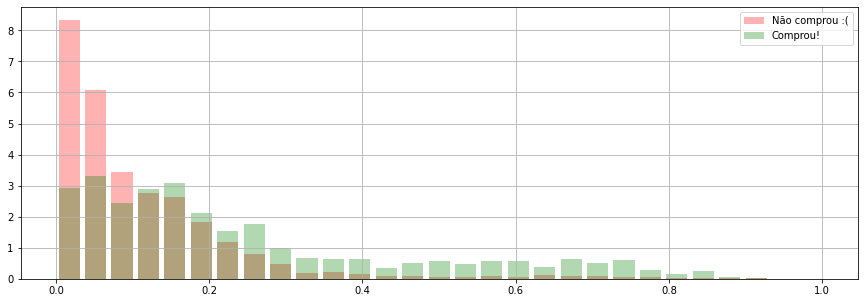

In [29]:
plt.figure(figsize=(15,5))

plt.hist(pred[y_test2==0,1], bins=np.linspace(0,1,30), color="r", alpha=.3, rwidth=.80, density=True, label="Não comprou :(")
plt.hist(pred[y_test2==1,1], bins=np.linspace(0,1,30), color="g", alpha=.3, rwidth=.80, density=True, label="Comprou!")

plt.legend()
plt.grid()

Aqui podemos ver qual são os scores das pessoas que compraram e não compraram. Qual a distribuição de probabilidade do modelo.

Em média, mais pessoas compram do que não compram.
Já consigo separar todo mundo que compra de quem não compra.

### E o alpha?

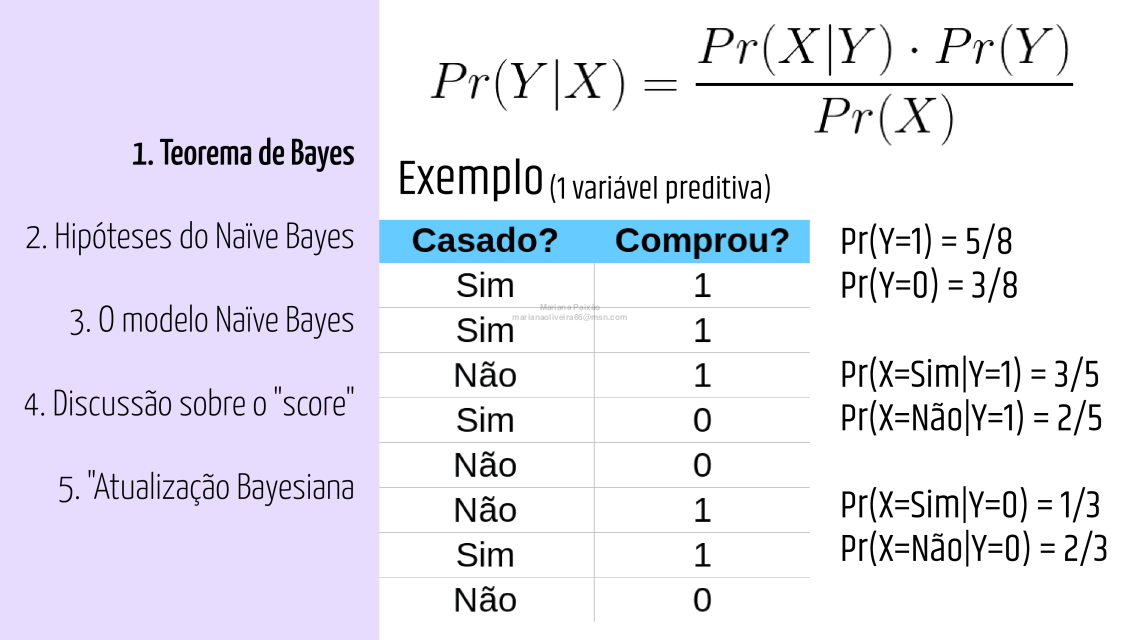

"Se chegar uma categoria nova que você nunca viu na vida, soma no numerador e no demoninador, uma constante"

"Laplace Smoothing"

In [30]:
X = df_pre[["casado"]]
y = df_pre.comprou

cnb = CategoricalNB(alpha=0, min_categories=3)

cnb.fit(X,y)

/home/mopdc/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


CategoricalNB(alpha=0, min_categories=3)

In [31]:
para_predizer = pd.DataFrame(columns=["casado"])
para_predizer.loc[0,:] = [2]
para_predizer

,casado
0,2


In [32]:
cnb.predict_proba(para_predizer)

array([[0.5, 0.5]])

array([[0.5, 0.5]]) ==> meio para comprar e meio para não comprar

### Faz sentido?

In [33]:
X = df_pre[["casado"]]
y = df_pre.comprou

cnb = CategoricalNB(alpha=1, min_categories=3)

cnb.fit(X,y)

CategoricalNB(alpha=1, min_categories=3)

In [34]:
para_predizer = pd.DataFrame(columns=["casado"])
para_predizer.loc[0,:] = [2]
para_predizer

,casado
0,2


In [35]:
cnb.predict_proba(para_predizer)

array([[0.44444444, 0.55555556]])

"Está um pouco mais provável de ser 'casado' do que não ser"

# Pois no treino, POR PADRÃO, eu tenho mais 1s que 0s. Em particular:

 - y=sim, eu tenho 5/8 = 0.625
 - y=não, eu tenho 3/8 = 0.375
 
Assim fica um pouco "mais próximo" da realidade de "não saber nada"

Para encontrar o melhor alpha, usaremos o Grid Search

### Recapitulando:

- Como criar uma tabela do zero
- Pré processamento: 
    - OrdinalEncoder: tabela com letras para números
    - Ordem arbitrária (ordem alfabética, mas tb posso passar uma ordem)
- Como aplicar o Naive Bayes Categórico
- Como separar o conjunto em treino e teste
- LabelEncoder: mesma coisa que o OrdinalEnconder, porém para somente uma coluna
- Como é o paramêtro Alpha
- E como fazer um histograma para ver se o nosso modelo está bom ou não